In [1]:
# Load necessary libraries
library(datasets)
library(ggplot2)
library(caret)
library(Rtsne)
library(umap)
library(MASS)
# Load the iris dataset
data(iris)


Loading required package: lattice



# PCA

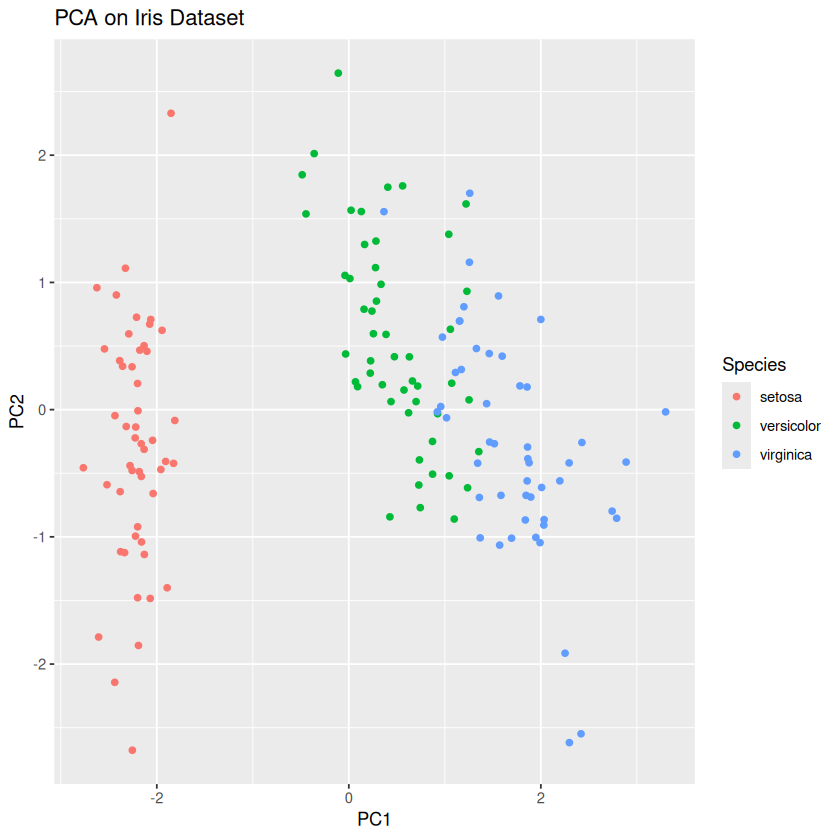

In [2]:
# Perform PCA
pca_result <- prcomp(iris[, -5], center = TRUE, scale. = TRUE)

# Create a data frame with the PCA results and the species information
pca_data <- data.frame(pca_result$x, Species = iris$Species)

# Plot the first two principal components
ggplot(pca_data, aes(x = PC1, y = PC2, color = Species)) +
  geom_point() +
  ggtitle("PCA on Iris Dataset")


# LDA

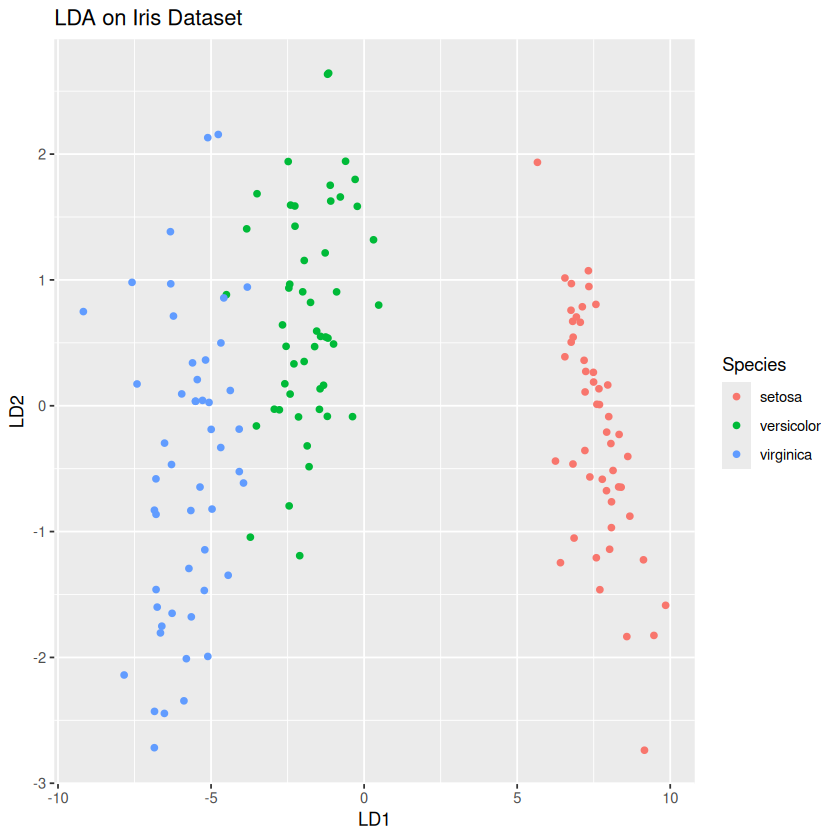

In [3]:
# Perform LDA
lda_model <- lda(Species ~ ., data = iris)
lda_result <- predict(lda_model)$x

# Create a data frame with the LDA results and the species information
lda_data <- data.frame(LD1 = lda_result[, 1], LD2 = lda_result[, 2], Species = iris$Species)

# Plot the first two linear discriminants
ggplot(lda_data, aes(x = LD1, y = LD2, color = Species)) +
  geom_point() +
  ggtitle("LDA on Iris Dataset")


# t-SNE

Performing PCA
Read the 149 x 4 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.709067)!
Learning embedding...
Iteration 50: error is 44.469538 (50 iterations in 0.01 seconds)
Iteration 100: error is 45.043495 (50 iterations in 0.01 seconds)
Iteration 150: error is 45.416057 (50 iterations in 0.01 seconds)
Iteration 200: error is 45.816996 (50 iterations in 0.01 seconds)
Iteration 250: error is 44.152870 (50 iterations in 0.01 seconds)
Iteration 300: error is 0.359544 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.128846 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.127723 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.126884 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.127771 (50 iterations in 0.01 seconds)
Fitting performed in 0.07 seconds.


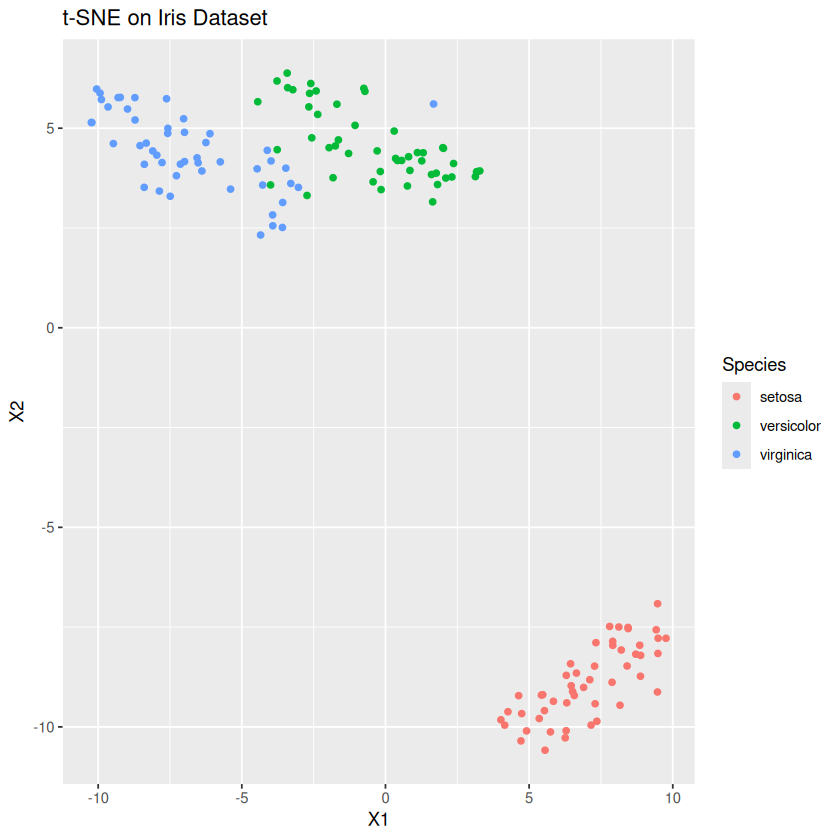

In [4]:
# Remove duplicate rows
iris_unique <- iris[!duplicated(iris), ]

# Perform t-SNE
tsne_result <- Rtsne(iris_unique[, -5], dims = 2, perplexity = 30, verbose = TRUE, max_iter = 500)

# Create a data frame with the t-SNE results and the species information
tsne_data <- data.frame(tsne_result$Y, Species = iris_unique$Species)

# Plot the t-SNE results
ggplot(tsne_data, aes(x = X1, y = X2, color = Species)) +
  geom_point() +
  ggtitle("t-SNE on Iris Dataset")


# UMAP

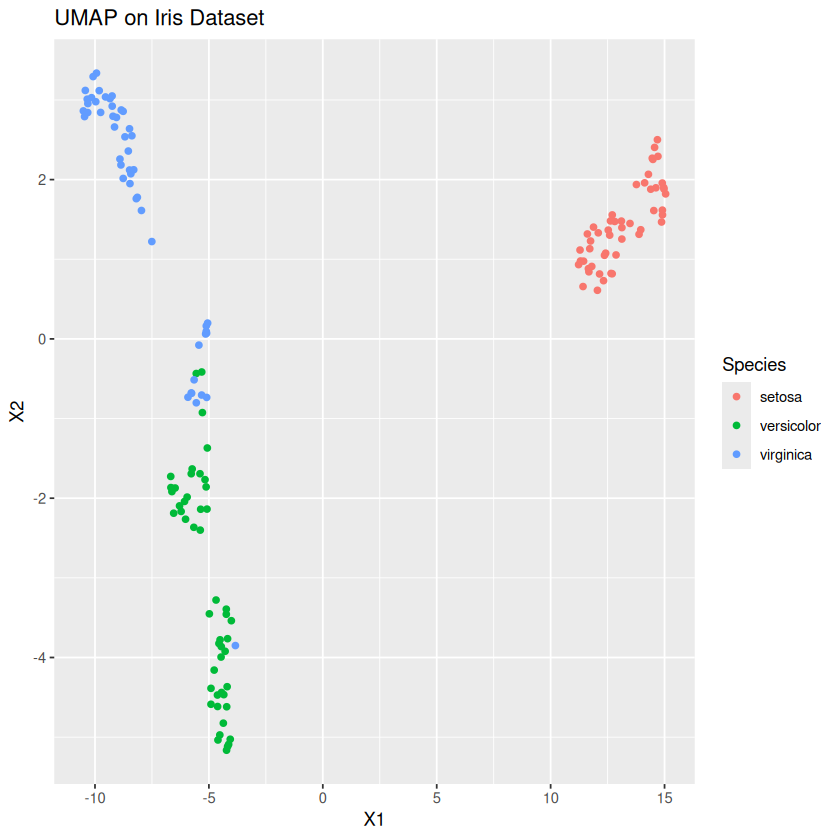

In [5]:
# 4. UMAP
umap_result <- umap(iris[, -5])
umap_data <- data.frame(umap_result$layout, Species = iris$Species)
ggplot(umap_data, aes(x = X1, y = X2, color = Species)) +
  geom_point() +
  ggtitle("UMAP on Iris Dataset")

# Independent Component Analysis (ICA)

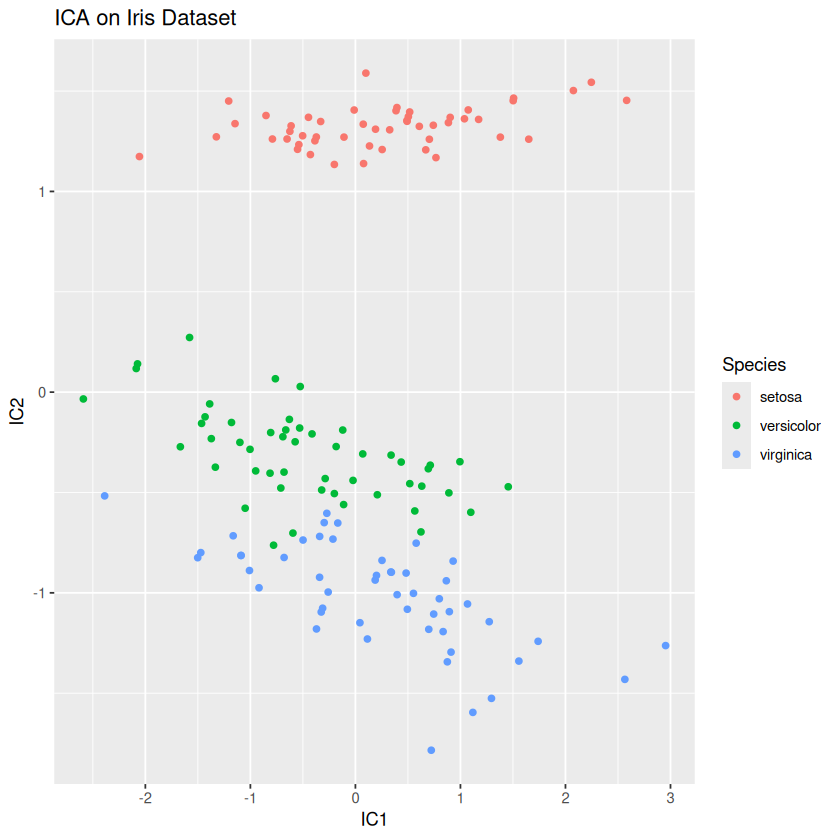

In [6]:
# Load necessary library
library(fastICA)

# Perform ICA
ica_result <- fastICA(iris[, -5], n.comp = 2)

# Create a data frame with the ICA results and the species information
ica_data <- data.frame(ica_result$S, Species = iris$Species)
colnames(ica_data) <- c("IC1", "IC2", "Species")

# Plot the first two independent components
ggplot(ica_data, aes(x = IC1, y = IC2, color = Species)) +
  geom_point() +
  ggtitle("ICA on Iris Dataset")


# Factor analysis


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”


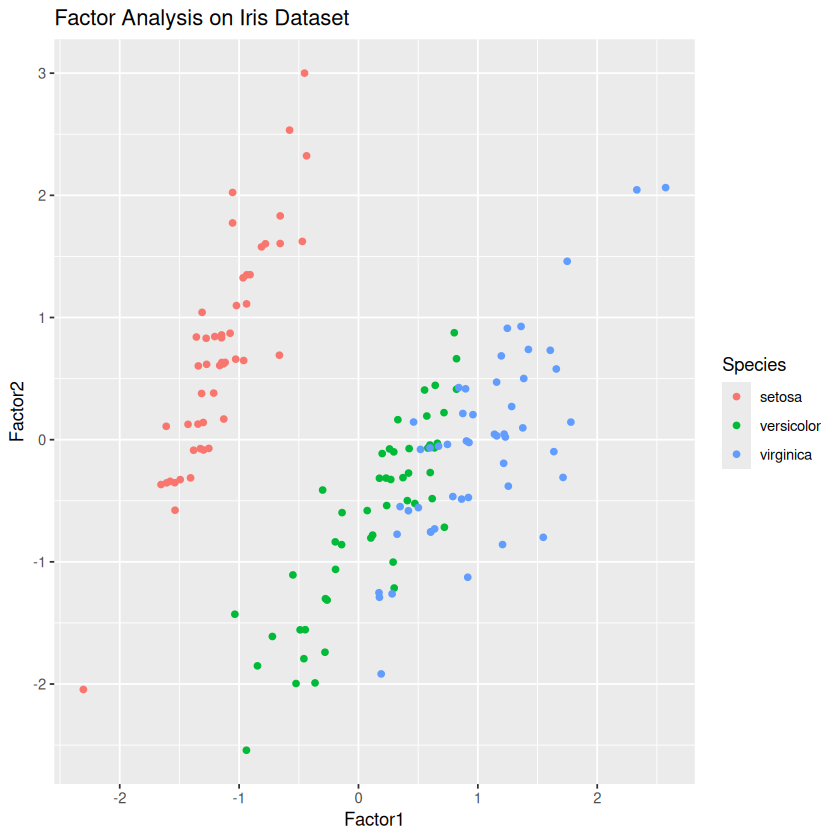

In [7]:
# Load necessary library
library(psych)

# Perform FA
fa_result <- fa(iris[, -5], nfactors = 2, rotate = "varimax")

# Create a data frame with the FA results and the species information
fa_data <- data.frame(fa_result$scores, Species = iris$Species)
colnames(fa_data) <- c("Factor1", "Factor2", "Species")

# Plot the first two factors
ggplot(fa_data, aes(x = Factor1, y = Factor2, color = Species)) +
  geom_point() +
  ggtitle("Factor Analysis on Iris Dataset")


# Multidimensional Scaling (MDS)

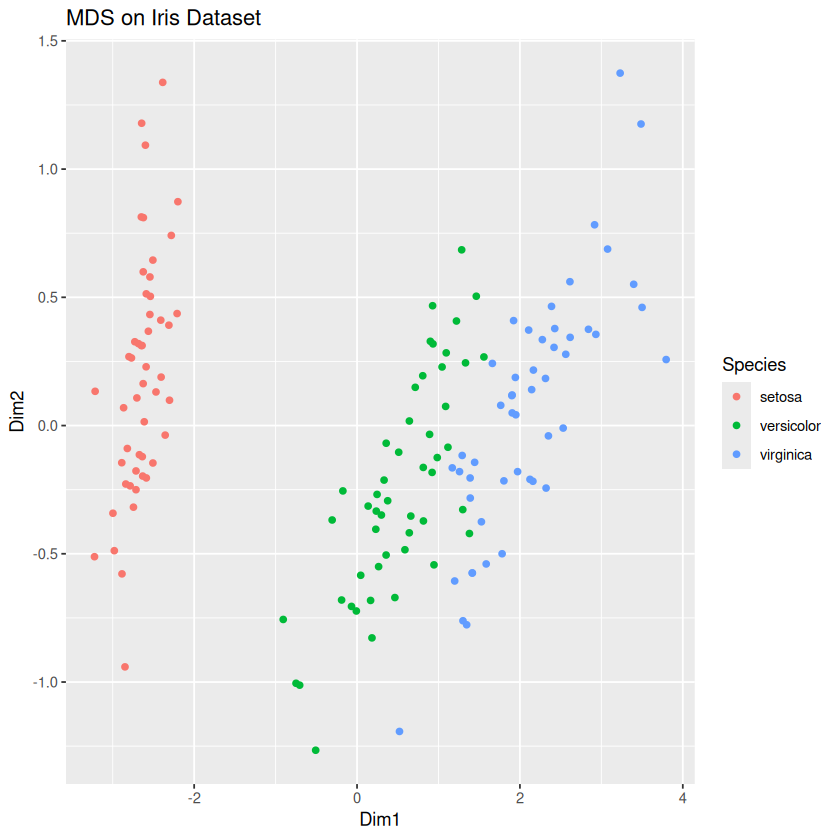

In [9]:
# Load necessary library
library(stats)

# Perform MDS
mds_result <- cmdscale(dist(iris[, -5]), k = 2)

# Create a data frame with the MDS results and the species information
mds_data <- data.frame(mds_result, Species = iris$Species)
colnames(mds_data) <- c("Dim1", "Dim2", "Species")

# Plot the MDS results
ggplot(mds_data, aes(x = Dim1, y = Dim2, color = Species)) +
  geom_point() +
  ggtitle("MDS on Iris Dataset")
